In [1]:
from jqdata import *
import jqdata
import numpy as np
import pandas as pd
import datetime

#先加载画图需要用的包
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
import seaborn as sns




# 打板追涨研究

### 获取数据的函数

In [2]:
def get_data(stock_list, date1,date2):  #date1为当前日期 date2 为X天前
    
    close = get_price(stock_list, end_date=date1, 
    frequency='daily', fields='close', count=1)['close']
    
    close_pre = get_price(stock_list, end_date=date2 , 
    frequency='daily', fields='close', count=1)['close']
    #price_now.columns = ['price']
    #price_20days = get_price(stock_list, end_date=date2, frequency='daily', fields='close', count=66)['close'].T
    #price_20days.columns = ['price']
    high = get_price(stock_list, end_date=date1, 
    frequency='daily', fields='high', count=1)['high']
    
    close = close.T
    close.columns = ['price']
    
    close_pre = close_pre.T
    close_pre.columns = ['price']
    
    high = high.T
    high.columns = ['price']
    
    close_pct = close/close_pre - 1
    high_pct = high/close_pre-1
    
    close_pct.columns = ['Close_price_change']
    high_pct.columns = ['High_price_change']
    
    Price = pd.concat([close_pct,high_pct],axis = 1)
    Price = Price.dropna()
    Price = Price[Price['High_price_change']>=0.08]
    
    return Price

### 获取深次新股成分股800天的当天最高涨幅大于8%的数据
看看获取的数据长什么样

In [6]:
stock_list1 = get_index_stocks('399678.XSHE')

today = datetime.datetime.now()
StartDate = today-datetime.timedelta(800)  #800天前
EndDate = today - datetime.timedelta(1)  #一天前
trading_dates = jqdata.get_trade_days(start_date=StartDate, end_date=EndDate) 

stock_data = get_data(stock_list1,trading_dates[-1]
,trading_dates[-2])

stock_data.head(10)

,Close_price_change,High_price_change
002848.XSHE,0.027990,0.092451
002902.XSHE,0.076958,0.100182
300693.XSHE,0.054720,0.094391
300713.XSHE,0.029398,0.088661


             Close_price_change  High_price_change
002848.XSHE            0.027990           0.092451
002902.XSHE            0.076958           0.100182
300693.XSHE            0.054720           0.094391
300713.XSHE            0.029398           0.088661
002848.XSHE            0.099813           0.099813
002890.XSHE            0.064382           0.089304
002897.XSHE            0.100000           0.100000
002902.XSHE            0.100200           0.100200
300644.XSHE            0.100000           0.100000
300719.XSHE            0.054397           0.099728
300603.XSHE            0.044030           0.100000
300610.XSHE            0.018930           0.083951
300664.XSHE            0.025974           0.099838
300697.XSHE            0.062387           0.099458
300705.XSHE            0.033435           0.091945
002895.XSHE            0.100000           0.100000
002906.XSHE            0.099908           0.099908
300634.XSHE            0.100042           0.100042
300688.XSHE            0.075530

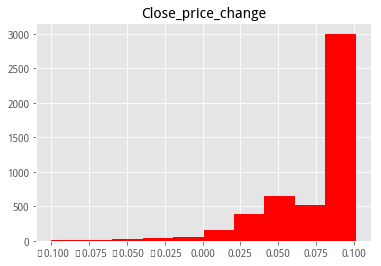

In [7]:
for i in range(2,len(trading_dates)-2):
    temp_data = get_data(stock_list1,trading_dates[-i],trading_dates[-(i+1)])
    stock_data = stock_data.append(temp_data)

a = len(stock_data)
b = len(stock_data[stock_data['Close_price_change']>=0.099])
print(stock_data.head(20))
print('涨停板占比%0.3f'%(b/a))


plt.hist(np.array(stock_data['Close_price_change']),color='r')
plt.title('Close_price_change')
plt.show()

# 获取数据改进版函数
考虑了开盘直接涨停买不进去，限制开盘涨幅小于8%\
即开盘涨小于8%，当日最高价大于8%

In [12]:
#改进版考虑了开盘直接涨停买不进去，限制开盘涨幅小于8%
def get_data2(stock_list, date1,date2):  #date1为当前日期 date2 为X天前   
    
    close = get_price(stock_list, end_date=date1, 
    frequency='daily', fields='close', count=1)['close']
    
    close_pre = get_price(stock_list, end_date=date2 , 
    frequency='daily', fields='close', count=1)['close']
    #price_now.columns = ['price']
    #price_20days = get_price(stock_list, end_date=date2, frequency='daily', fields='close', count=66)['close'].T
    #price_20days.columns = ['price']
    high = get_price(stock_list, end_date=date1, 
    frequency='daily', fields='high', count=1)['high']
    
    open_price = get_price(stock_list, end_date=date1, 
    frequency='daily', fields='open', count=1)['open']
    
    open_price = open_price.T
    open_price.columns = ['price']
    
    
    close = close.T
    close.columns = ['price']
    
    close_pre = close_pre.T
    close_pre.columns = ['price']
    
    high = high.T
    high.columns = ['price']
    
    close_pct = close/close_pre - 1
    high_pct = high/close_pre-1
    open_pct = open_price/close_pre - 1
    
    
    close_pct.columns = ['Close_price_change']
    high_pct.columns = ['High_price_change']
    open_pct.columns = ['Open_price_change']
    
    
    Price = pd.concat([close_pct,high_pct,open_pct],axis = 1)
    Price = Price.dropna()
    Price = Price[Price['High_price_change']>=0.08]
    Price = Price[Price['Open_price_change']<0.08]
    
    return Price

重新获取数据来测试，发现收盘涨停板比例小了很多，但占比还是很高的

             Close_price_change  High_price_change  Open_price_change
002848.XSHE            0.027990           0.092451           0.007634
002902.XSHE            0.076958           0.100182           0.074681
300693.XSHE            0.054720           0.094391          -0.015048
300713.XSHE            0.029398           0.088661          -0.005133
002848.XSHE            0.099813           0.099813           0.016791
002890.XSHE            0.064382           0.089304           0.002596
002897.XSHE            0.100000           0.100000           0.008475
002902.XSHE            0.100200           0.100200           0.052104
300644.XSHE            0.100000           0.100000           0.009763
300719.XSHE            0.054397           0.099728           0.010879
300603.XSHE            0.044030           0.100000          -0.000746
300610.XSHE            0.018930           0.083951          -0.020576
300664.XSHE            0.025974           0.099838          -0.025974
300697.XSHE         

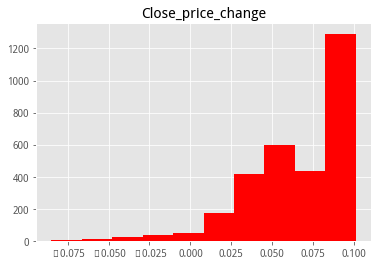

In [15]:
stock_data = get_data2(stock_list1,trading_dates[-1]
,trading_dates[-2])
for i in range(2,len(trading_dates)-2):
    temp_data = get_data2(stock_list1,trading_dates[-i],trading_dates[-(i+1)])
    stock_data = stock_data.append(temp_data)

a = len(stock_data)
b = len(stock_data[stock_data['Close_price_change']>=0.099])
print(stock_data.head(20))
print('涨停板占比%0.3f'%(b/a))


plt.hist(np.array(stock_data['Close_price_change']),color='r')
plt.title('Close_price_change')
plt.show()

### 

In [14]:
stock_data = get_data2(stock_list1,trading_dates[-1]
,trading_dates[-2])
stock_data

,Close_price_change,High_price_change,Open_price_change
002848.XSHE,0.027990,0.092451,0.007634
002902.XSHE,0.076958,0.100182,0.074681
300693.XSHE,0.054720,0.094391,-0.015048
300713.XSHE,0.029398,0.088661,-0.005133


### 改进版考虑了开盘直接涨停买不进去，限制开盘涨幅小于9%

In [16]:
#改进版考虑了开盘直接涨停买不进去，限制开盘涨幅小于9%
def get_data3(stock_list, date1,date2):  #date1为当前日期 date2 为X天前   
    
    close = get_price(stock_list, end_date=date1, 
    frequency='daily', fields='close', count=1)['close']
    
    close_pre = get_price(stock_list, end_date=date2 , 
    frequency='daily', fields='close', count=1)['close']
    #price_now.columns = ['price']
    #price_20days = get_price(stock_list, end_date=date2, frequency='daily', fields='close', count=66)['close'].T
    #price_20days.columns = ['price']
    high = get_price(stock_list, end_date=date1, 
    frequency='daily', fields='high', count=1)['high']
    
    open_price = get_price(stock_list, end_date=date1, 
    frequency='daily', fields='open', count=1)['open']
    
    open_price = open_price.T
    open_price.columns = ['price']
    
    
    close = close.T
    close.columns = ['price']
    
    close_pre = close_pre.T
    close_pre.columns = ['price']
    
    high = high.T
    high.columns = ['price']
    
    close_pct = close/close_pre - 1
    high_pct = high/close_pre-1
    open_pct = open_price/close_pre - 1
    
    
    close_pct.columns = ['Close_price_change']
    high_pct.columns = ['High_price_change']
    open_pct.columns = ['Open_price_change']
    
    
    Price = pd.concat([close_pct,high_pct,open_pct],axis = 1)
    Price = Price.dropna()
    Price = Price[Price['High_price_change']>=0.09]
    Price = Price[Price['Open_price_change']<0.09]
    
    return Price

### 最高价大于9%，开盘小于9%
收盘涨停的比例大于0.42，即在9%的时候追有42%的概率当天封板

             Close_price_change  High_price_change  Open_price_change
600400.XSHG           -0.032558           0.100000           0.060465
600405.XSHG            0.036446           0.093394          -0.020501
600775.XSHG            0.061511           0.100176          -0.003515
600776.XSHG            0.100629           0.100629          -0.004717
601028.XSHG            0.038462           0.091093           0.014170
601038.XSHG            0.044487           0.096712          -0.005803
603078.XSHG            0.056991           0.100177           0.013805
603196.XSHG            0.027505           0.098232          -0.027505
603444.XSHG            0.092647           0.100030          -0.010778
603595.XSHG            0.047721           0.096972          -0.008259
603688.XSHG            0.064860           0.091965          -0.003872
603703.XSHG            0.075112           0.099776          -0.023543
603711.XSHG            0.089388           0.097229           0.004705
600167.XSHG         

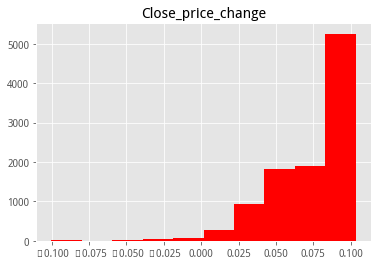

In [17]:
stock_list1 = get_index_stocks('000002.XSHG')

stock_data = get_data3(stock_list1,trading_dates[-1]
,trading_dates[-2])
for i in range(2,len(trading_dates)-2):
    temp_data = get_data3(stock_list1,trading_dates[-i],trading_dates[-(i+1)])
    stock_data = stock_data.append(temp_data)

a = len(stock_data)
b = len(stock_data[stock_data['Close_price_change']>=0.099])
print(stock_data.head(20))
print('涨停板占比%0.3f'%(b/a))


plt.hist(np.array(stock_data['Close_price_change']),color='r')
plt.title('Close_price_change')
plt.show()

             Close_price_change  High_price_change  Open_price_change
600400.XSHG           -0.032558           0.100000           0.060465
600405.XSHG            0.036446           0.093394          -0.020501
600775.XSHG            0.061511           0.100176          -0.003515
600776.XSHG            0.100629           0.100629          -0.004717
601028.XSHG            0.038462           0.091093           0.014170
601038.XSHG            0.044487           0.096712          -0.005803
603063.XSHG            0.048951           0.081119          -0.019580
603078.XSHG            0.056991           0.100177           0.013805
603196.XSHG            0.027505           0.098232          -0.027505
603444.XSHG            0.092647           0.100030          -0.010778
603595.XSHG            0.047721           0.096972          -0.008259
603688.XSHG            0.064860           0.091965          -0.003872
603703.XSHG            0.075112           0.099776          -0.023543
603711.XSHG         

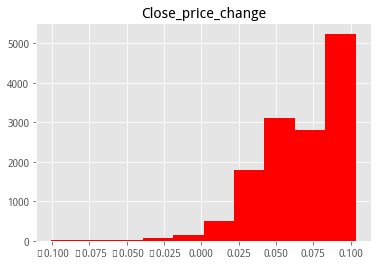

In [18]:
stock_list1 = get_index_stocks('000002.XSHG')

stock_data = get_data2(stock_list1,trading_dates[-1]
,trading_dates[-2])
for i in range(2,len(trading_dates)-2):
    temp_data = get_data2(stock_list1,trading_dates[-i],trading_dates[-(i+1)])
    stock_data = stock_data.append(temp_data)

a = len(stock_data)
b = len(stock_data[stock_data['Close_price_change']>=0.099])
print(stock_data.head(20))
print('涨停板占比%0.3f'%(b/a))


plt.hist(np.array(stock_data['Close_price_change']),bins = 20,color='r')
plt.title('Close_price_change')
plt.show()

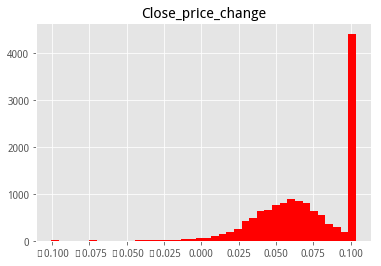

In [20]:

plt.hist(np.array(stock_data['Close_price_change']),bins = 40,color='r')
plt.title('Close_price_change')
plt.show()

## 完善函数，计算股价在超过9%瞬间买入，第二天收盘卖出的收益率earning

In [46]:
#改进版考虑了开盘直接涨停买不进去，限制开盘涨幅小于9%
def get_data4(stock_list, date1,date2,date3):  #date1为当前日期 date2 为1天前    date3为后一天
    
    close = get_price(stock_list, end_date=date1, 
    frequency='daily', fields='close', count=1)['close']
    
    close_pre = get_price(stock_list, end_date=date2 , 
    frequency='daily', fields='close', count=1)['close']
    
    close_after = get_price(stock_list, end_date=date3 , 
    frequency='daily', fields='high', count=1)['high']
    
    #price_now.columns = ['price']
    #price_20days = get_price(stock_list, end_date=date2, frequency='daily', fields='close', count=66)['close'].T
    #price_20days.columns = ['price']
    high = get_price(stock_list, end_date=date1, 
    frequency='daily', fields='high', count=1)['high']
    
    
    
    open_price = get_price(stock_list, end_date=date1, 
    frequency='daily', fields='open', count=1)['open']
    
    open_price = open_price.T
    open_price.columns = ['price']
    
    
    close = close.T
    close.columns = ['price']
    
    close_pre = close_pre.T
    close_pre.columns = ['price']
    
    close_after = close_after.T
    close_after.columns = ['price']
    
    high = high.T
    high.columns = ['price']
    
    close_pct = close/close_pre - 1
    high_pct = high/close_pre-1
    open_pct = open_price/close_pre - 1
    earning_next_day =  close_after/(1.09 * close_pre) -1   #按照头一天涨幅9%的时候买入来算earning
    
    close_pct.columns = ['Close_price_change']
    high_pct.columns = ['High_price_change']
    open_pct.columns = ['Open_price_change']
    earning_next_day.columns = ['Earning']
    
    Price = pd.concat([close_pct,high_pct,open_pct,earning_next_day],axis = 1)
    Price = Price.dropna()
    Price = Price[Price['High_price_change']>=0.09]
    Price = Price[Price['Open_price_change']<0.09]
    
    return Price

滚动获取数据，并打印出数据来观察
# 
计算满足条件买入后第二日收盘价卖出收益率

             Close_price_change  High_price_change  Open_price_change  \
002848.XSHE            0.099813           0.099813           0.016791   
002897.XSHE            0.100000           0.100000           0.008475   
002902.XSHE            0.100200           0.100200           0.052104   
300644.XSHE            0.100000           0.100000           0.009763   
300719.XSHE            0.054397           0.099728           0.010879   
300603.XSHE            0.044030           0.100000          -0.000746   
300664.XSHE            0.025974           0.099838          -0.025974   
300697.XSHE            0.062387           0.099458          -0.018987   
300705.XSHE            0.033435           0.091945          -0.011398   
002895.XSHE            0.100000           0.100000           0.003306   
002906.XSHE            0.099908           0.099908           0.001833   
300634.XSHE            0.100042           0.100042          -0.005836   
300698.XSHE            0.044820           0.096624 

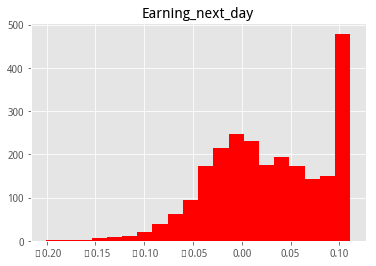

In [47]:
stock_list1 = get_index_stocks('399678.XSHE')

stock_data = get_data4(stock_list1,trading_dates[-2],trading_dates[-3],trading_dates[-1])
for i in range(2,len(trading_dates)-3):
    temp_data = get_data4(stock_list1,trading_dates[-(i+1)],trading_dates[-(i+2)],trading_dates[-i])
    stock_data = stock_data.append(temp_data)

a = len(stock_data)
b = len(stock_data[stock_data['Close_price_change']>=0.099])
print(stock_data.head(20))
print('涨停板占比%0.3f'%(b/a))


zhuanqian = len(stock_data[stock_data['Earning']>0])
print('赚钱占比%0.3f'%(zhuanqian/a))


plt.hist(np.array(stock_data['Earning']),bins = 20,color='r')
plt.title('Earning_next_day')
plt.show()

### 计算出最终盈利的占比为65.1%

In [48]:
len(stock_data[stock_data['Earning']>0])

1579

### 计算此策略平均每次盈利

In [49]:
stock_data['Earning'].mean()

0.028297942874847465


#### 证明此追涨打板策略是有一定效果的，
$ t-statistics =（μ-0)/σ $
#### 可以用t检验证明收益率是显著的
